In [3]:
install.packages("phrs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
library(dplyr)
library(ggplot2)
library(phrs)
library(getPass)
library(DBI)
library(odbc)

In [93]:
# Load geodata -----------------------------------------------------------------

# Connect to EDW and query for data

conn <- DBI::dbConnect(
  odbc::odbc(),
  dsn = "EDWP_USER",
  uid = getPass::getPass("UID: "),
  pwd = getPass::getPass("PASSWORD: ")
)

UID: ········
PASSWORD: ········


In [75]:
sql_file <- "Vax_Outreach_Spend.sql"

In [106]:
df <-
  readChar(sql_file, file.info(sql_file)$size) %>%
  strsplit(";", fixed = TRUE) %>%
  .[[1]] %>%
  lapply(., function(x) DBI::dbGetQuery(conn, x)) %>%
  .[sapply(., nrow) > 0] %>%
  .[[1]]

In [147]:
DBI::dbDisconnect(conn)

In [148]:
df

STATE_CODE,EDW_MEMBER_CK,MEMBER_CURR_CK,Sex,AGE,RACE,COVID_Risk_Reason,Product,IP_SPEND,ICU_SPEND,NON_ACUTE_SPEND,TOT_SPEND,Flagged_For_Outreach
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GA,386026314,620888389,M,49,Hispanic,Kidney Disease,Marketplace,0,0.00,537.74,537.74,0
FL,43405059,277753526,M,49,Hispanic,Cancer,Marketplace,0,0.00,143.26,143.26,0
NY,321327891,549705358,F,13,Unknown,Asthma,TANF,0,0.00,29.49,29.49,0
NY,324745379,553122846,M,26,White,Cardiac Condition,TANF,0,0.00,37.92,37.92,0
NY,422413868,648520335,F,60,White,Cardiac Condition,TANF,0,0.00,938.29,938.29,0
IA,354452040,582544507,F,49,White,Diabetes,Expansion,0,0.00,8.53,8.53,0
WA,382421746,610153213,M,59,Hispanic,Kidney Disease,Expansion,0,23661.23,1026.32,24687.55,0
NY,321901936,550279403,F,37,Unknown,Obesity,HARP,0,0.00,237.33,237.33,0
NY,324548410,552925877,M,64,White,50 or older,Marketplace,0,0.00,51.33,51.33,0


In [149]:
Outreach<-filter(df, Flagged_For_Outreach == 1)
NoOut<-filter(df, Flagged_For_Outreach == 0)

In [151]:
control_sample <- ph_rej_sample(NoOut,Outreach, c("AGE", "Sex", "RACE","Product","STATE_CODE"), 60000)

Intesection size = 0.95 (0 is worst, 1 is best.)

Expected acceptance rate = 0.006 (Very low values may indicate a problem.)

Jensen-Shannon divergence = 0.01906  (0 is best.)



In [152]:
length(unique(control_sample$EDW_MEMBER_CK))

[1] 39664

In [153]:
summary(control_sample)

   STATE_CODE    EDW_MEMBER_CK       MEMBER_CURR_CK        Sex       
 NY     :26032   Min.   :    27812   Min.   :    27812   F   :41973  
 TX     : 7360   1st Qu.:173934175   1st Qu.:413499138   M   :18003  
 CA     : 5240   Median :321252452   Median :549652452   NA's:   24  
 FL     : 4371   Mean   :271883175   Mean   :499856412               
 LA     : 2439   3rd Qu.:354432508   3rd Qu.:582530451               
 (Other):14534   Max.   :531563215   Max.   :756606682               
 NA's   :   24   NA's   :24          NA's   :24                      
      AGE                                RACE      
 Min.   : 16.00   Asian                    : 2841  
 1st Qu.: 42.00   Black or African American: 8067  
 Median : 55.00   Hispanic                 :17161  
 Mean   : 53.27   Unknown                  : 1265  
 3rd Qu.: 63.00   White                    :30642  
 Max.   :102.00   NA's                     :   24  
 NA's   :24                                        
                 COVID_R

In [140]:
summary(unique_control)

   STATE_CODE    EDW_MEMBER_CK       MEMBER_CURR_CK      Sex      
 NY     :24121   Min.   :    24185   Min.   :    24185   F:41194  
 TX     : 6120   1st Qu.:215324595   1st Qu.:451675944   M:15234  
 CA     : 4725   Median :321365888   Median :549772049            
 FL     : 3545   Mean   :275704575   Mean   :503932197            
 LA     : 2699   3rd Qu.:360325166   3rd Qu.:588641283            
 GA     : 2507   Max.   :533736862   Max.   :758766329            
 (Other):12711                                                    
      AGE                                RACE      
 Min.   : 16.00   Asian                    : 2805  
 1st Qu.: 37.00   Black or African American: 6837  
 Median : 51.00   Hispanic                 :16426  
 Mean   : 50.16   Unknown                  : 1269  
 3rd Qu.: 61.00   White                    :29091  
 Max.   :102.00                                    
                                                   
                 COVID_Risk_Reason        Produc

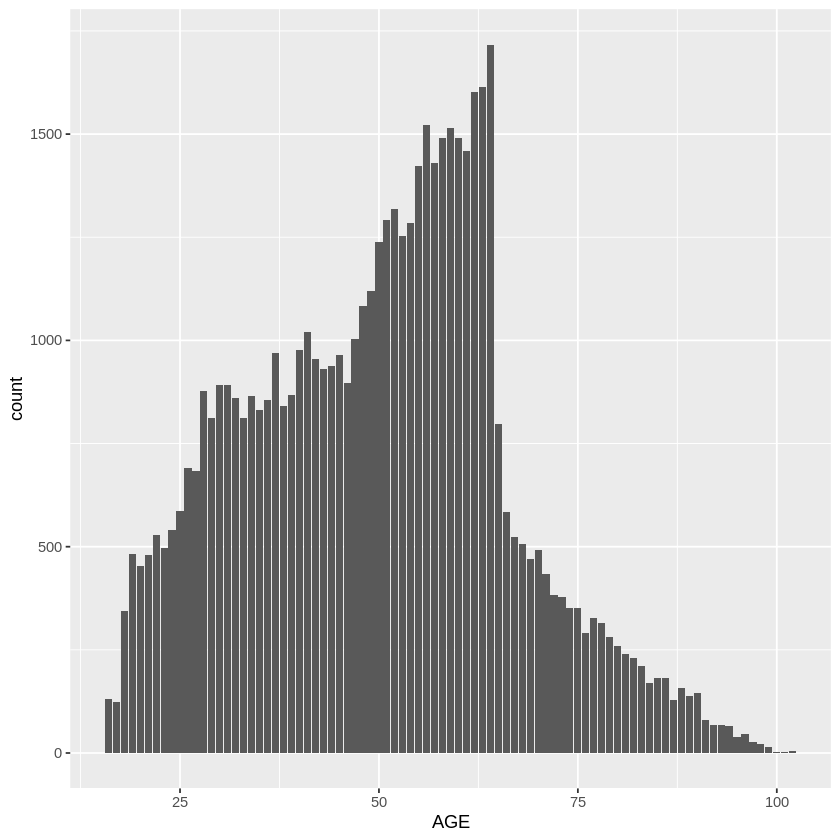

In [141]:
ggplot(unique_control) + geom_bar(aes(x = AGE))

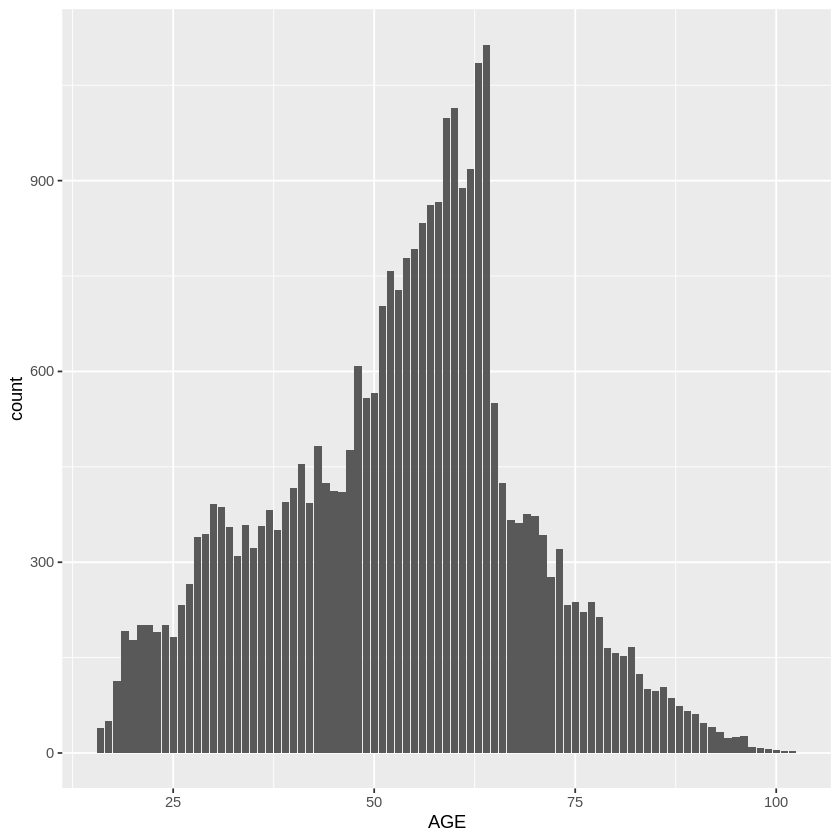

In [142]:
ggplot(control_sample) + geom_bar(aes(x = AGE))

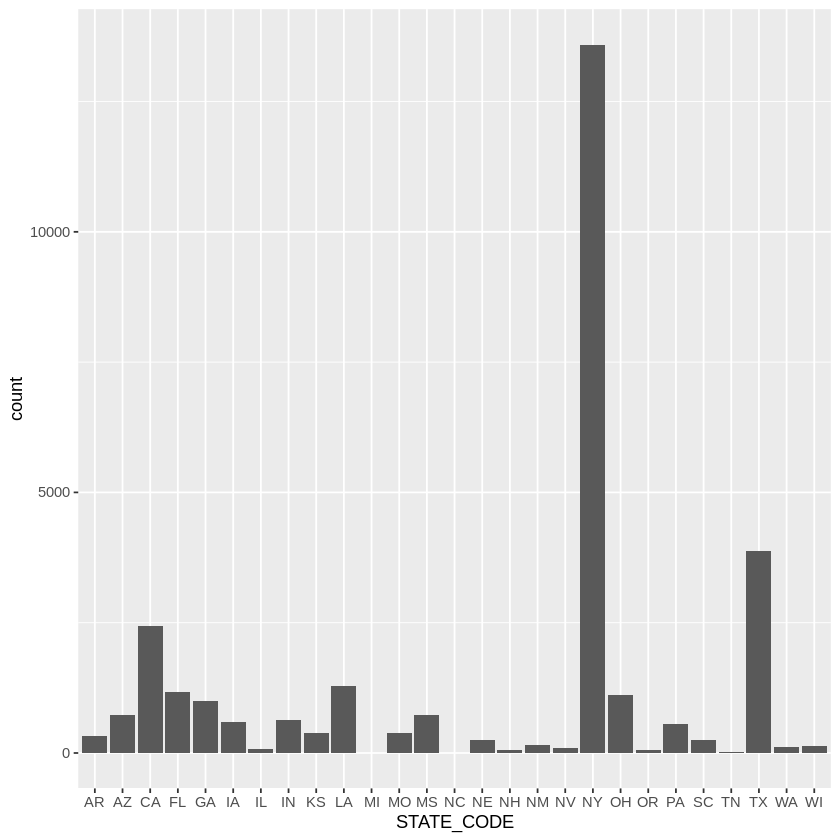

In [100]:
ggplot(Outreach) + geom_bar(aes(x = STATE_CODE))

In [118]:
#unique_control<-unique(control_sample)

In [154]:
control_sample$matched<-1

In [155]:
df2<-merge(x = df, y = control_sample[ , c("EDW_MEMBER_CK", "matched")], by = "EDW_MEMBER_CK", all.x=TRUE)

In [156]:
df2$matched[is.na(df2$matched)] <- 0
df2$matched[df2$Flagged_For_Outreach == 1] <- 1   

In [157]:
write.csv(df2,'matched_control_sample.csv',row.names = FALSE)